Data loaded successfully. Shape: (7770, 10)
Engineering features...
Creating feature: close_lag (type: lag)
Creating feature: volume_lag (type: lag)
Creating feature: close_return (type: return)
Creating feature: close_ema (type: ema)
Creating feature: rsi (type: rsi)
Creating feature: rsi (type: rsi)
Creating feature: bollinger (type: bollinger)
Creating feature: bollinger (type: bollinger)
Creating feature: bollinger (type: bollinger)
Creating feature: bollinger (type: bollinger)
Creating feature: diff (type: diff)
Creating feature: diff (type: diff)
Creating feature: diff (type: diff)
Creating feature: diff (type: diff)
Creating feature: diff (type: diff)
Feature engineering complete. Shape before NaN removal: (7770, 30)
Final shape: (5618, 30)
Rows dropped due to NaN values: 2152

===== DATASET DATES =====
Dataset date range: 1994-01-28 00:00:00 to 2024-12-27 00:00:00
Total dates in dataset: 5618

===== SEQUENCE CREATION =====
Total sequences created: 5599
First sequence dates: 199

<ipython-input-4-108a44ac91e0>:78: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df[column].pct_change(lag)
<ipython-input-4-108a44ac91e0>:78: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df[column].pct_change(lag)
<ipython-input-4-108a44ac91e0>:78: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df[column].pct_change(lag)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/r

Epoch 1/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 45s 128ms/step - loss: 0.0043 - val_loss: 3.2397e-04 - learning_rate: 0.0010
Epoch 2/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - loss: 5.3748e-04 - val_loss: 2.6488e-04 - learning_rate: 0.0010
Epoch 3/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 118ms/step - loss: 4.1206e-04 - val_loss: 2.5120e-04 - learning_rate: 0.0010
Epoch 4/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - loss: 3.9199e-04 - val_loss: 3.4154e-04 - learning_rate: 0.0010
Epoch 5/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - loss: 3.5654e-04 - val_loss: 2.0923e-04 - learning_rate: 0.0010
Epoch 6/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - loss: 3.0043e-04 - val_loss: 1.9386e-04 - learning_rate: 0.0010
Epoch 7/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - loss: 3.1110e-04 - val_loss: 2.6463e-04 - learning_rate: 0.0010
Epoch 8/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - loss: 2.7777e-04 - val_loss: 2.6859e-04 - learning_rate: 0.0010
Epoch 9/50
245/245 ━━━━━━━━━━━━━━━━━

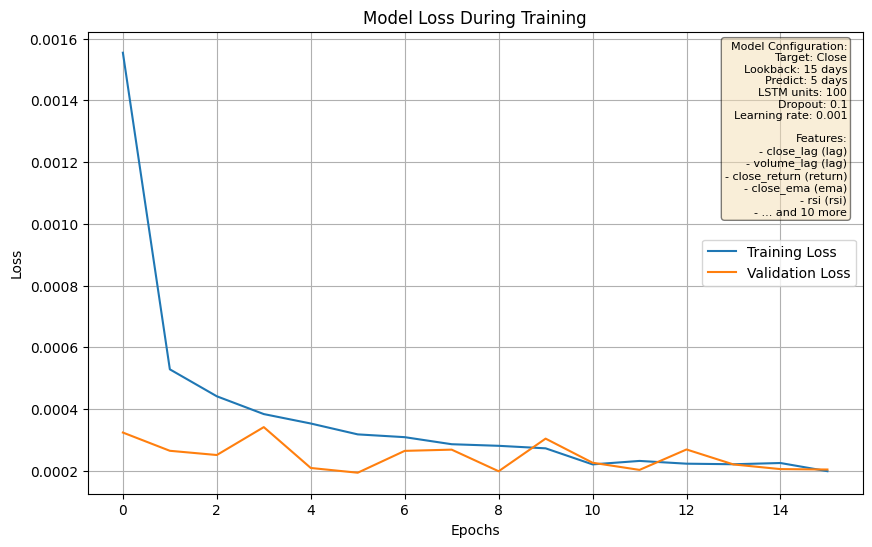

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step

===== TEST PREDICTION DATES =====
Number of test sequences: 841
First 3 test sequence end dates: [Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00')]

Model Performance Metrics:
day_1: MSE=0.000707, MAE=0.018362, RMSE=0.026590
day_2: MSE=0.000897, MAE=0.020452, RMSE=0.029950
day_3: MSE=0.001447, MAE=0.027168, RMSE=0.038045
day_4: MSE=0.001584, MAE=0.027791, RMSE=0.039800
day_5: MSE=0.001748, MAE=0.029185, RMSE=0.041812

===== DATE ALIGNMENT FOR PLOTTING =====
Number of test points: 841
First 3 dates in prediction sequence: [Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00')]

Day 1 prediction dates:
First 3 target dates: [Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00')]

Day 2 prediction dates:
First 3 target dates: [Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('

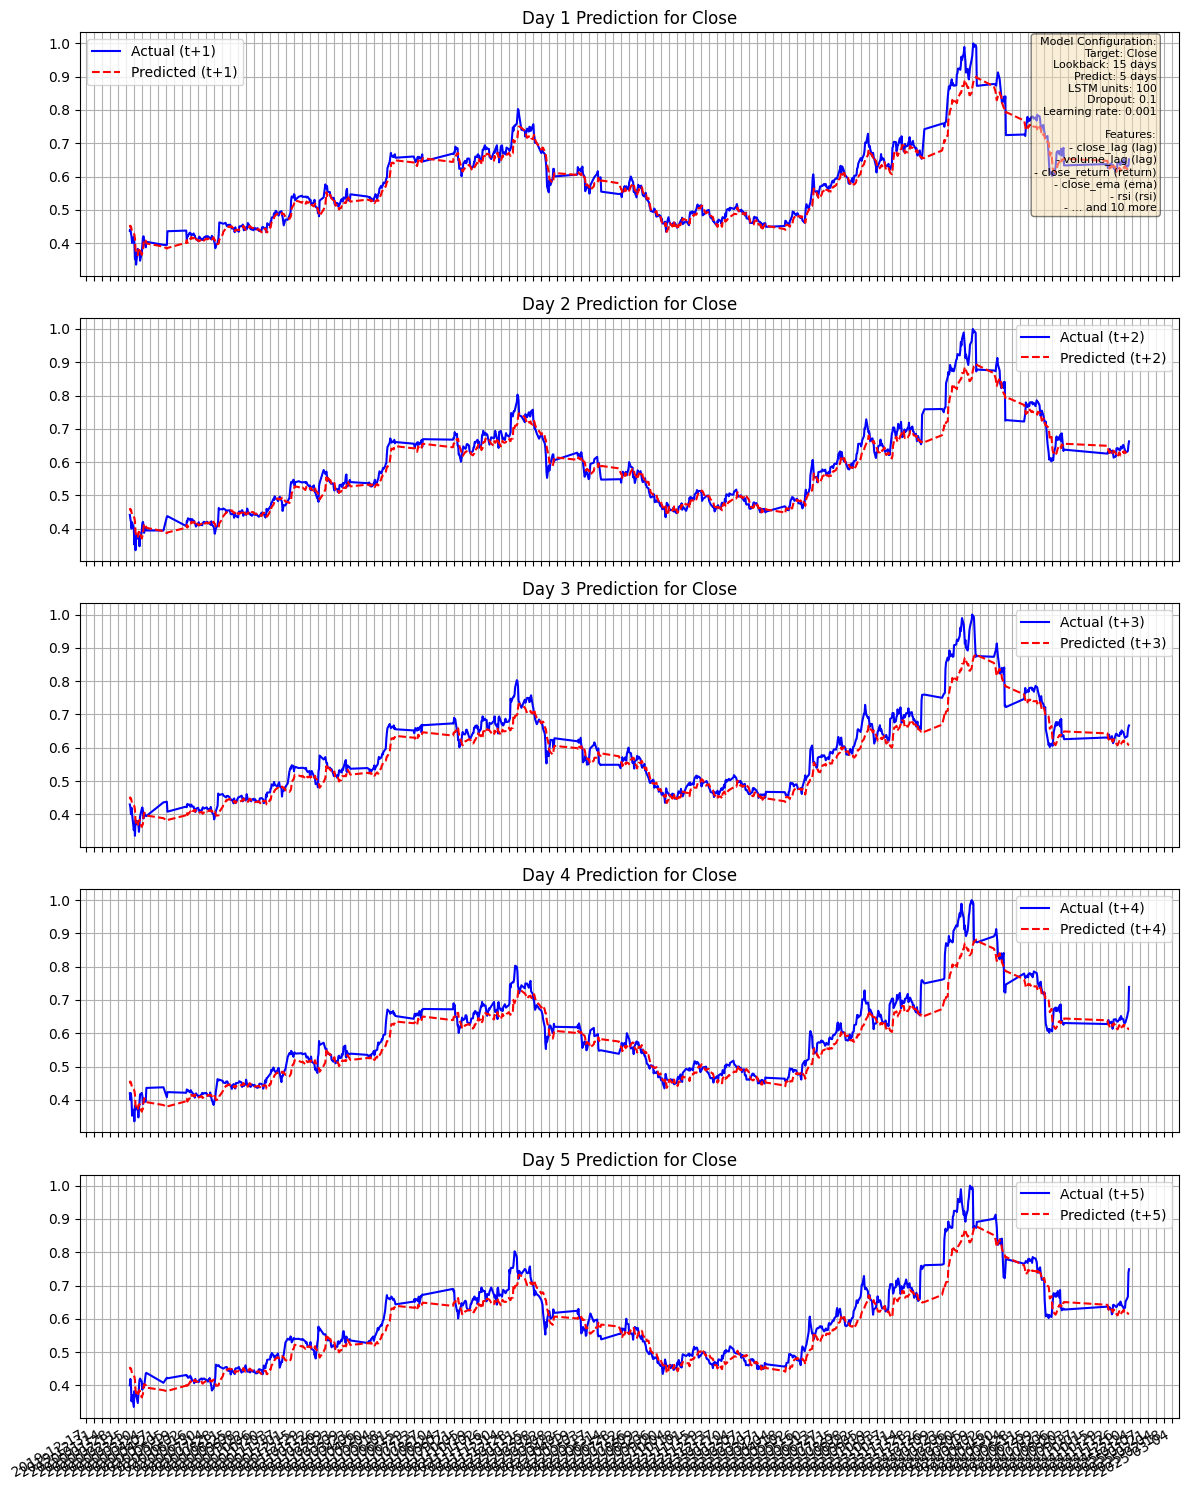

Metrics saved to lstm_metrics_20250310-003642.csv


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import os

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configuration dictionary for maintainability
CONFIG = {
    'features': [
        {'name': 'close_lag', 'column': 'Close', 'type': 'lag', 'params': {'lag': [1, 2, 3, 5]}},
        {'name': 'volume_lag', 'column': 'Volume', 'type': 'lag', 'params': {'lag': [1, 2, 5]}},

        {'name': 'close_return', 'column': 'Close', 'type': 'return', 'params': {'lag': [1, 5, 10]}},

        {'name': 'close_ema', 'column': 'Close', 'type': 'ema', 'params': {'span': [12, 26]}},

        {'name': 'rsi', 'column': 'Close', 'type': 'rsi', 'params': {'window': 9}},
        {'name': 'rsi', 'column': 'Close', 'type': 'rsi', 'params': {'window': 14}},

        {'name': 'bollinger', 'column': 'Close', 'type': 'bollinger', 'params': {'window': 10, 'std': 1.5}},
        {'name': 'bollinger', 'column': 'Close', 'type': 'bollinger', 'params': {'window': 10, 'std': 2}},

        {'name': 'bollinger', 'column': 'Close', 'type': 'bollinger', 'params': {'window': 10, 'std': 2.5}}, # L2
        {'name': 'bollinger', 'column': 'Close', 'type': 'bollinger', 'params': {'window': 20, 'std': 2.5}}, # L2
        {'name': 'diff', 'column': 'Open', 'type': 'diff', 'params': {'column2': 'Close'}},
        {'name': 'diff', 'column': 'Open', 'type': 'diff', 'params': {'column2': 'High'}},
        {'name': 'diff', 'column': 'Close', 'type': 'diff', 'params': {'column2': 'Low'}},
        {'name': 'diff', 'column': 'High', 'type': 'diff', 'params': {'column2': 'Close'}},
        {'name': 'diff', 'column': 'Open', 'type': 'diff', 'params': {'column2': 'Low'}},

        ],
    'learning_rate': 0.001,
    'target_column': 'Close',
    'n_steps_in': 15,
    'n_steps_out': 5,
    'epochs': 50,
    'batch_size': 16,
    'lstm_units': 100,
    'dropout_rate': 0.1,
    'learning_rate': 0.001,
}

        # {'name': 'close_ma', 'column': 'Close', 'type': 'ma', 'params': {'window': [5, 10, 20]}},
# {'name': 'bollinger', 'column': 'Close', 'type': 'bollinger', 'params': {'window': 20, 'std': 2}},
# {'name': 'bollinger', 'column': 'Close', 'type': 'bollinger', 'params': {'window': 20, 'std': 2}},

# {'name': 'macd', 'column': 'Close', 'type': 'macd', 'params': {'fast': 12, 'slow': 26, 'signal': 9}}
# Differences between price points within the same day
# Load data from CSV file
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        print(f"Data loaded successfully. Shape: {df.shape}")
        return df
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None

# Feature engineering functions
def create_lag_feature(df, column, lag):
    """Create lagged features (shifted values)"""
    return df[column].shift(lag)

def create_return_feature(df, column, lag):
    """Create return features (percentage change)"""
    return df[column].pct_change(lag)

def create_ma_feature(df, column, window):
    """Create moving average features"""
    return df[column].rolling(window=window).mean()

def create_ema_feature(df, column, span):
    """Create exponential moving average features"""
    return df[column].ewm(span=span, adjust=False).mean()

def create_rsi_feature(df, column, window):
    """Create Relative Strength Index feature"""
    delta = df[column].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def create_bollinger_feature(df, column, window, std):
    """Create Bollinger Bands features"""
    ma = df[column].rolling(window=window).mean()
    std_dev = df[column].rolling(window=window).std()
    upper_band = ma + (std_dev * std)
    lower_band = ma - (std_dev * std)
    width = (upper_band - lower_band) / ma

    # Return dictionary of features
    return {
        'bb_ma': ma,
        'bb_upper': upper_band,
        'bb_lower': lower_band,
        'bb_width': width
    }

def create_macd_feature(df, column, fast, slow, signal):
    """Create MACD features"""
    ema_fast = df[column].ewm(span=fast, adjust=False).mean()
    ema_slow = df[column].ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    macd_signal = macd.ewm(span=signal, adjust=False).mean()
    macd_hist = macd - macd_signal

    # Return dictionary of features
    return {
        'macd': macd,
        'macd_signal': macd_signal,
        'macd_hist': macd_hist
    }

# Add the following function to create price difference features
def create_diff_feature(df, column1, column2=None, lag=0):
    """Create difference features between two columns or between a column and its lagged version"""
    if column2 is None:
        # If second column is not provided, use lagged version of first column
        return df[column1] - df[column1].shift(lag)
    else:
        # If both columns are provided, calculate their difference
        return df[column1] - df[column2]

# Engineer features based on configuration
def engineer_features(df, feature_config):
    """
    Add engineered features based on configuration
    """
    print("Engineering features...")

    # Create a copy to avoid modifying the original
    df_featured = df.copy()

    feature_creators = {
        'lag': create_lag_feature,
        'return': create_return_feature,
        'ma': create_ma_feature,
        'ema': create_ema_feature,
        'rsi': create_rsi_feature,
        'bollinger': create_bollinger_feature,
        'macd': create_macd_feature,
        'diff': create_diff_feature  # Add the new diff feature creator
    }

    # Process each feature configuration
    for feature in feature_config:
        feature_name = feature['name']
        column = feature['column']
        feature_type = feature['type']
        params = feature['params']

        if column not in df_featured.columns:
            print(f"Warning: Column '{column}' not found in data. Skipping feature '{feature_name}'.")
            continue

        # Check if the feature type is supported
        if feature_type not in feature_creators:
            print(f"Warning: Feature type '{feature_type}' not supported. Skipping feature '{feature_name}'.")
            continue

        print(f"Creating feature: {feature_name} (type: {feature_type})")

        # Process the feature based on its type and parameters
        if feature_type in ['lag', 'return']:
            if isinstance(params['lag'], list):
                for lag in params['lag']:
                    col_name = f"{feature_name}_{lag}"
                    df_featured[col_name] = feature_creators[feature_type](df_featured, column, lag)
            else:
                col_name = f"{feature_name}_{params['lag']}"
                df_featured[col_name] = feature_creators[feature_type](df_featured, column, params['lag'])

        elif feature_type in ['ma', 'ema']:
            param_key = 'window' if feature_type == 'ma' else 'span'
            if isinstance(params[param_key], list):
                for window in params[param_key]:
                    col_name = f"{feature_name}_{window}"
                    df_featured[col_name] = feature_creators[feature_type](df_featured, column, window)
            else:
                col_name = f"{feature_name}_{params[param_key]}"
                df_featured[col_name] = feature_creators[feature_type](df_featured, column, params[param_key])

        elif feature_type == 'rsi':
            col_name = f"{feature_name}_{params['window']}"
            df_featured[col_name] = feature_creators[feature_type](df_featured, column, params['window'])

        elif feature_type == 'bollinger':
            bb_features = feature_creators[feature_type](
                df_featured, column, params['window'], params['std']
            )
            for bb_name, bb_series in bb_features.items():
                df_featured[f"{feature_name}_{bb_name}"] = bb_series

        elif feature_type == 'macd':
            macd_features = feature_creators[feature_type](
                df_featured, column, params['fast'], params['slow'], params['signal']
            )
            for macd_name, macd_series in macd_features.items():
                df_featured[f"{feature_name}_{macd_name}"] = macd_series
        elif feature_type == 'diff':
            # Get the parameters
            column1 = column
            column2 = params.get('column2', None)
            lag = params.get('lag', 0)

            # Create appropriate column name based on parameters
            if column2 is None:
                col_name = f"{feature_name}_{column1}_lag{lag}"
            else:
                col_name = f"{feature_name}_{column1}_{column2}"

            # Create the feature
            df_featured[col_name] = feature_creators[feature_type](
                df_featured, column1, column2, lag
            )
    # Drop rows with NaN values after feature engineering
    original_rows = len(df_featured)
    df_featured = df_featured.dropna()

    print(f"Feature engineering complete. Shape before NaN removal: {(original_rows, df_featured.shape[1])}")
    print(f"Final shape: {df_featured.shape}")
    print(f"Rows dropped due to NaN values: {original_rows - len(df_featured)}")

    return df_featured

# Scale data using MinMaxScaler
def scale_data(df, target_col):
    """
    Scale the data and return the scalers for later use
    """
    feature_columns = df.columns.tolist()
    target_idx = feature_columns.index(target_col)

    # Create separate scalers for features and target
    feature_scaler = MinMaxScaler()

    # Scale the data
    scaled_data = feature_scaler.fit_transform(df)

    return scaled_data, feature_scaler, target_idx

# Create input-output sequences for LSTM
def create_sequences(data, n_steps_in, n_steps_out, target_idx, dates=None):
    X, y = [], []
    sequence_dates = []
    target_dates = []

    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:i + n_steps_in])  # Input sequence
        y.append(data[i + n_steps_in:i + n_steps_in + n_steps_out, target_idx])  # Output sequence (target)

        # If dates are provided, also track corresponding dates
        if dates is not None:
            # Dates for the input sequence
            sequence_dates.append(dates[i:i + n_steps_in])
            # Dates for the target values
            target_dates.append(dates[i + n_steps_in:i + n_steps_in + n_steps_out])

    if dates is not None:
        return np.array(X), np.array(y), sequence_dates, target_dates
    else:
        return np.array(X), np.array(y)

# Build an LSTM model
def build_lstm_model(input_shape, output_dim, units, dropout_rate, learning_rate):
    model = Sequential([
    Bidirectional(LSTM(units, return_sequences=True, recurrent_dropout=0.1), input_shape=input_shape),
    Dropout(dropout_rate),
    Bidirectional(LSTM(units, return_sequences=False, recurrent_dropout=0.1)),
    Dropout(dropout_rate),
    Dense(output_dim)
])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Add config information to plot
def add_config_info(fig, axis_obj, config):
    # Create a string of config info
    features_text = "\n".join([f"- {feat['name']} ({feat['type']})" for feat in config['features'][:5]])
    if len(config['features']) > 5:
        features_text += f"\n- ... and {len(config['features']) - 5} more"

    config_text = "\n".join([
        "Model Configuration:",
        f"Target: {config['target_column']}",
        f"Lookback: {config['n_steps_in']} days",
        f"Predict: {config['n_steps_out']} days",
        f"LSTM units: {config['lstm_units']}",
        f"Dropout: {config['dropout_rate']}",
        f"Learning rate: {config['learning_rate']}",
        "\nFeatures:",
        features_text
    ])

    # Position the text in the top-right corner
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axis_obj.text(0.98, 0.98, config_text, transform=axis_obj.transAxes, fontsize=8,
                 verticalalignment='top', horizontalalignment='right', bbox=props)

# Plot the model training loss
def plot_loss(history, config):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss During Training')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

    # Add config information
    add_config_info(fig, ax, config)

    # Save figure with timestamp
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    plt.savefig(f'lstm_loss_{timestamp}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot the predicted vs actual values - FIXED function with date printing
def plot_predictions(y_true, y_pred, dates, target_dates, n_steps_out, config):
    fig, axes = plt.subplots(n_steps_out, 1, figsize=(12, 3*n_steps_out))

    if n_steps_out == 1:
        axes = [axes]

    # Print alignment of dates to verify correctness
    print("\n===== DATE ALIGNMENT FOR PLOTTING =====")
    print(f"Number of test points: {len(dates)}")
    print(f"First 3 dates in prediction sequence: {dates[:3]}")

    # Plot for each prediction step
    for i in range(n_steps_out):
        # Print target dates for this step
        print(f"\nDay {i+1} prediction dates:")
        print(f"First 3 target dates: {[td[i] for td in target_dates[:3]]}")

        # Plot using the correct sequence and target dates
        axes[i].plot(dates, y_true[:, i], 'b-', label=f'Actual (t+{i+1})')
        axes[i].plot(dates, y_pred[:, i], 'r--', label=f'Predicted (t+{i+1})')
        axes[i].set_title(f'Day {i+1} Prediction for {config["target_column"]}')
        axes[i].legend()
        axes[i].grid(True)

        axes[i].xaxis.set_major_locator(mdates.YearLocator())
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        fig.autofmt_xdate()

    # Add config information to the first subplot
    add_config_info(fig, axes[0], config)

    plt.tight_layout()

    # Save figure with timestamp
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    plt.savefig(f'lstm_predictions_{timestamp}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    results = {}
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        results[f'day_{i+1}'] = {'MSE': mse, 'MAE': mae, 'RMSE': np.sqrt(mse)}

    return results

# Main execution function - FIXED function with date tracking
def main():
    # Load data
    df = load_data('data.csv')
    if df is None:
        return
    cols_to_drop = [col for col in df.columns if col.endswith("prev")]
    if cols_to_drop:
      df = df.drop(columns=cols_to_drop)

    # Engineer features
    df_featured = engineer_features(df, CONFIG['features'])

    # Print first few dates of the dataset for reference
    print("\n===== DATASET DATES =====")
    print(f"Dataset date range: {df_featured.index[0]} to {df_featured.index[-1]}")
    print(f"Total dates in dataset: {len(df_featured.index)}")

    # Scale data
    scaled_data, feature_scaler, target_idx = scale_data(df_featured, CONFIG['target_column'])

    # Create sequences with date tracking
    X, y, sequence_dates, target_dates = create_sequences(
        scaled_data, CONFIG['n_steps_in'], CONFIG['n_steps_out'], target_idx, df_featured.index
    )

    # Print sequence details
    print("\n===== SEQUENCE CREATION =====")
    print(f"Total sequences created: {len(X)}")
    print(f"First sequence dates: {sequence_dates[0][0]} to {sequence_dates[0][-1]}")
    print(f"First target dates: {target_dates[0][0]} to {target_dates[0][-1]}")

    # Train-validation-test split
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    # Split the date sequences as well
    train_seq_dates = sequence_dates[:train_size]
    val_seq_dates = sequence_dates[train_size:train_size + val_size]
    test_seq_dates = sequence_dates[train_size + val_size:]

    train_target_dates = target_dates[:train_size]
    val_target_dates = target_dates[train_size:train_size + val_size]
    test_target_dates = target_dates[train_size + val_size:]

    # Print split information
    print("\n===== DATA SPLITS =====")
    print(f"Training data: {train_size} sequences")
    print(f"Validation data: {val_size} sequences")
    print(f"Testing data: {len(X_test)} sequences")

    print(f"\nTraining date range: {train_seq_dates[0][0]} to {train_target_dates[-1][-1]}")
    print(f"Validation date range: {val_seq_dates[0][0]} to {val_target_dates[-1][-1]}")
    print(f"Testing date range: {test_seq_dates[0][0]} to {test_target_dates[-1][-1]}")

    print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
    print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
    print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

    # Build model
    model = build_lstm_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        output_dim=CONFIG['n_steps_out'],
        units=CONFIG['lstm_units'],
        dropout_rate=CONFIG['dropout_rate'],
        learning_rate=CONFIG['learning_rate']
    )

    # Define callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=CONFIG['epochs'],
        batch_size=CONFIG['batch_size'],
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plot_loss(history, CONFIG)

    # Make predictions
    y_pred = model.predict(X_test)

    # Get the last date of each input sequence for the test set
    test_plot_dates = [dates[-1] for dates in test_seq_dates]

    print("\n===== TEST PREDICTION DATES =====")
    print(f"Number of test sequences: {len(test_seq_dates)}")
    print(f"First 3 test sequence end dates: {test_plot_dates[:3]}")

    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred)
    print("\nModel Performance Metrics:")
    for day, scores in metrics.items():
        print(f"{day}: MSE={scores['MSE']:.6f}, MAE={scores['MAE']:.6f}, RMSE={scores['RMSE']:.6f}")

    # Plot predictions
    plot_predictions(y_test, y_pred, test_plot_dates, test_target_dates, CONFIG['n_steps_out'], CONFIG)

    # Save metrics to CSV
    metrics_df = pd.DataFrame()
    for day, scores in metrics.items():
        for metric, value in scores.items():
            metrics_df.loc[day, metric] = value

    timestamp = time.strftime("%Y%m%d-%H%M%S")
    metrics_df.to_csv(f'lstm_metrics_{timestamp}.csv')
    print(f"Metrics saved to lstm_metrics_{timestamp}.csv")

if __name__ == "__main__":
    main()



```
Bi:
15 - 50
Model Performance Metrics:
day_1: MSE=0.001289, MAE=0.025974, RMSE=0.035909
day_2: MSE=0.001877, MAE=0.031379, RMSE=0.043323
day_3: MSE=0.002610, MAE=0.036773, RMSE=0.051085
day_4: MSE=0.003442, MAE=0.041921, RMSE=0.058668
day_5: MSE=0.004059, MAE=0.045680, RMSE=0.063710

Added all Diffs
Model Performance Metrics:
day_1: MSE=0.000987, MAE=0.022973, RMSE=0.031411
day_2: MSE=0.001561, MAE=0.028784, RMSE=0.039505
day_3: MSE=0.002141, MAE=0.033352, RMSE=0.046270
day_4: MSE=0.002726, MAE=0.037711, RMSE=0.052208
day_5: MSE=0.003549, MAE=0.042050, RMSE=0.059570

Added 2 lag for both Close and Volume
day_1: MSE=0.001066, MAE=0.023568, RMSE=0.032643
day_2: MSE=0.001542, MAE=0.029439, RMSE=0.039269
day_3: MSE=0.002384, MAE=0.034991, RMSE=0.048821
day_4: MSE=0.002920, MAE=0.038205, RMSE=0.054041
day_5: MSE=0.003645, MAE=0.042930, RMSE=0.060376

After including from 1994:
Model Performance Metrics:
day_1: MSE=0.000707, MAE=0.018362, RMSE=0.026590
day_2: MSE=0.000897, MAE=0.020452, RMSE=0.029950
day_3: MSE=0.001447, MAE=0.027168, RMSE=0.038045
day_4: MSE=0.001584, MAE=0.027791, RMSE=0.039800
day_5: MSE=0.001748, MAE=0.029185, RMSE=0.041812

```





```
Attention: -
15
day_1: MSE=0.002402, MAE=0.036046, RMSE=0.049006
day_2: MSE=0.002677, MAE=0.039238, RMSE=0.051741
day_3: MSE=0.002971, MAE=0.042940, RMSE=0.054509
day_4: MSE=0.003456, MAE=0.045610, RMSE=0.058786
day_5: MSE=0.003986, MAE=0.048280, RMSE=0.063137

30
day_1: MSE=0.005011, MAE=0.048603, RMSE=0.070790
day_2: MSE=0.004418, MAE=0.048691, RMSE=0.066468
day_3: MSE=0.005862, MAE=0.053135, RMSE=0.076566
day_4: MSE=0.006445, MAE=0.055389, RMSE=0.080279
day_5: MSE=0.008258, MAE=0.063055, RMSE=0.090875

After including from 1994
day_1: MSE=0.004248, MAE=0.044083, RMSE=0.065179
day_2: MSE=0.004375, MAE=0.044869, RMSE=0.066146
day_3: MSE=0.004385, MAE=0.044489, RMSE=0.066221
day_4: MSE=0.004860, MAE=0.047690, RMSE=0.069715
day_5: MSE=0.005089, MAE=0.048920, RMSE=0.071334
```

